# Autoregression model

In [21]:
def autoregression_model(data):
    import numpy as np
    import pandas as pd
    import statsmodels.api as sm
    from statsmodels.tsa.arima.model import ARIMA
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")

    frequency = str(input("Enter the frequency of the data (T, H, D, W, M , Y): "))
    index_freq = frequency.upper()
    index = pd.date_range(start=data.index[0], periods=len(data), freq=index_freq)

    p = None  
    best_aic = np.inf  
    for i in range(1, 25):  
        model = sm.tsa.ARIMA(data, order=(i, 1, 0), freq=frequency)  
        results = model.fit()
        aic = results.aic 
        if aic < best_aic:
            best_aic = aic
            p = i
    model = ARIMA(data, order=(p, 1, 0), freq=frequency).fit()
    
    print_result = input("Do you want the model summary to be shown? (y/n): ")
    if print_result.lower() == 'y':
        print(f"Best p: {p}")
        print(model.summary())
    else:
        pass
    
    print_result = input("Want to show the plot? (y/n): ")
    if print_result.lower() == 'y':
        predictions = model.predict(start=data.index[0], end=data.index[-1], typ='levels')
        print(predictions)
        plt.plot(index, data.values, label='Actual')
        plt.plot(index, predictions.values, label='Predicted')
        plt.legend()
        plt.show()
    else:
        pass

    n_periods = int(input("Enter the number of periods you want to predict: "))
    model = ARIMA(data, order=(p, 1, 0), freq=frequency)
    results = model.fit()
    forecast = results.forecast(steps=n_periods)
    print(forecast)


In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
BTC = yf.download("BTC-USD")
price = BTC["Close"]
R = price.pct_change().dropna()
r = np.log(price/price.shift(1)).dropna()
print ("R is:", R)
print ("r is:", r)


[*********************100%***********************]  1 of 1 completed
R is: Date
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
2014-09-22    0.008352
                ...   
2023-04-27    0.036981
2023-04-28   -0.004530
2023-04-29   -0.003128
2023-04-30    0.000695
2023-05-01   -0.025563
Name: Close, Length: 3148, dtype: float64
r is: Date
2014-09-18   -0.074643
2014-09-19   -0.072402
2014-09-20    0.035111
2014-09-21   -0.024968
2014-09-22    0.008317
                ...   
2023-04-27    0.036313
2023-04-28   -0.004541
2023-04-29   -0.003133
2023-04-30    0.000694
2023-05-01   -0.025896
Name: Close, Length: 3148, dtype: float64


In [7]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [10]:
print ("acf R is:", acf(R))
print ("acf r is:", acf(r))

acf R is: [ 1.         -0.01691039  0.00487755  0.01576669  0.00743228  0.0068847
  0.04618014 -0.02494427 -0.02168538  0.00353856  0.03823454  0.00807033
 -0.00399454  0.00420719  0.00439474  0.00953989 -0.00209014  0.03073926
  0.01166007  0.02137902  0.03444975 -0.03613138 -0.00790527 -0.03065916
  0.017318    0.0025652   0.01676452  0.0150137   0.004842   -0.0266279
  0.00833492  0.00702601 -0.02794274  0.05538113 -0.01447668]
acf r is: [ 1.00000000e+00 -1.69659917e-02  8.22859922e-03  1.49852344e-02
  1.02823419e-02  7.70321723e-03  4.72636279e-02 -2.77943278e-02
 -2.37435919e-02  1.43390471e-03  3.83847503e-02  4.94111176e-03
 -4.92837107e-03  5.37637620e-03  5.23111787e-03  1.06508630e-02
 -9.50346683e-04  3.31660597e-02  8.79278190e-03  2.00123663e-02
  3.19695694e-02 -3.66910934e-02 -7.69287425e-03 -3.21549973e-02
  1.54065401e-02  6.15216829e-04  1.73830981e-02  1.40189657e-02
  5.40929385e-03 -2.45468113e-02  5.75499635e-03  9.35220571e-03
 -2.81695022e-02  5.48646422e-02 -1

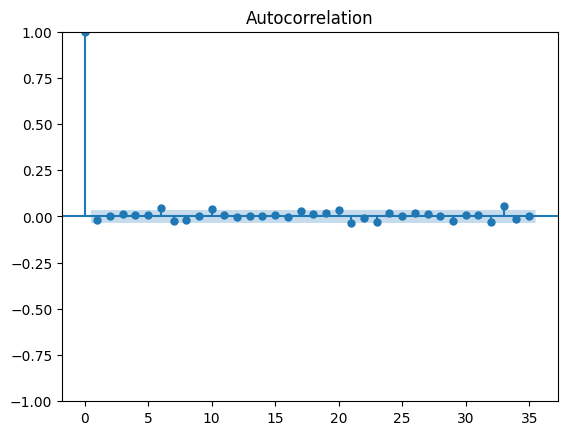

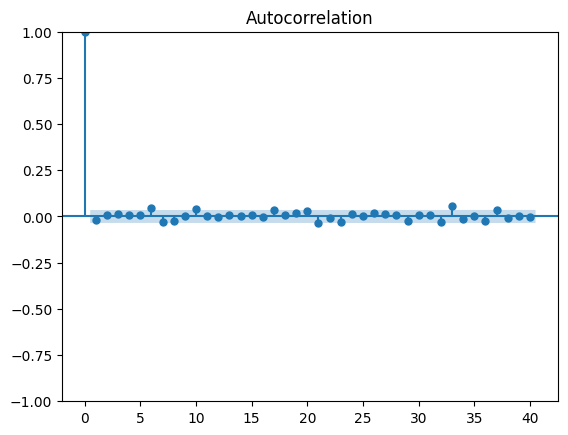

In [19]:
plot_acf (R)
plt.show()

plot_acf (r , lags=40)
plt.show()

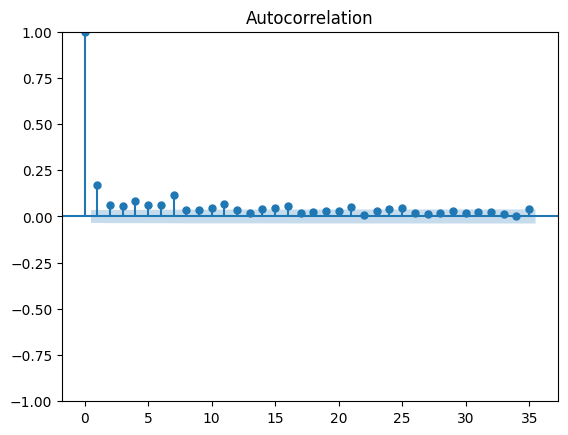

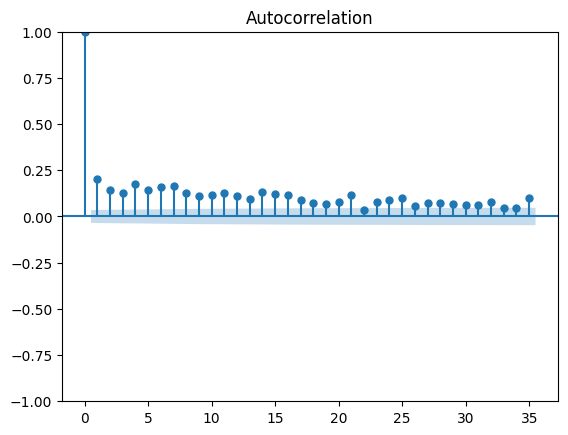

In [18]:
plot_acf (R**2)
plt.show()

plot_acf (abs(r))
plt.show()

In [9]:
autoregression_model(price)

Enter the frequency of the data (T, H, D, W, M , Y): D


F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, 

Do you want the model summary to be shown? (y/n): n
Want to show the plot? (y/n): n
Enter the number of periods you want to predict: 10


F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-05-02    28502.756308
2023-05-03    28457.053202
2023-05-04    28454.708253
2023-05-05    28603.018872
2023-05-06    28762.983780
2023-05-07    28751.924620
2023-05-08    29043.215759
2023-05-09    28904.557976
2023-05-10    28933.709754
2023-05-11    28715.466542
Freq: D, Name: predicted_mean, dtype: float64


In [12]:
BTC_H = yf.download("BTC-USD", interval="1h", start="2023-04-25")
price_H = BTC_H["Close"]

[*********************100%***********************]  1 of 1 completed


Enter the frequency of the data (T, H, D, W, M , Y): H
Do you want the model summary to be shown? (y/n): y
Best p: 7
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  156
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1049.825
Date:                Mon, 01 May 2023   AIC                           2115.650
Time:                        16:08:36   BIC                           2139.997
Sample:                    04-25-2023   HQIC                          2125.539
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1438      0.112     -1.284      0.199      -0.364       0.076
ar.L2         

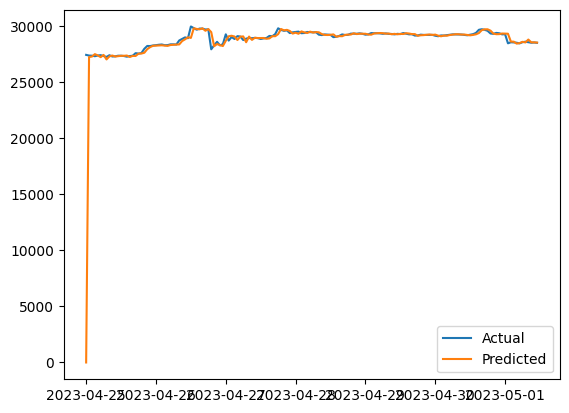

Enter the number of periods you want to predict: 25
2023-05-01 12:00:00+00:00    28538.491908
2023-05-01 13:00:00+00:00    28517.321088
2023-05-01 14:00:00+00:00    28512.226729
2023-05-01 15:00:00+00:00    28523.085127
2023-05-01 16:00:00+00:00    28534.541334
2023-05-01 17:00:00+00:00    28524.988973
2023-05-01 18:00:00+00:00    28536.547327
2023-05-01 19:00:00+00:00    28537.905579
2023-05-01 20:00:00+00:00    28540.872503
2023-05-01 21:00:00+00:00    28540.874386
2023-05-01 22:00:00+00:00    28539.749461
2023-05-01 23:00:00+00:00    28536.106005
2023-05-02 00:00:00+00:00    28539.113041
2023-05-02 01:00:00+00:00    28535.415790
2023-05-02 02:00:00+00:00    28534.824984
2023-05-02 03:00:00+00:00    28534.636109
2023-05-02 04:00:00+00:00    28534.927940
2023-05-02 05:00:00+00:00    28534.560687
2023-05-02 06:00:00+00:00    28535.882532
2023-05-02 07:00:00+00:00    28535.070141
2023-05-02 08:00:00+00:00    28536.066999
2023-05-02 09:00:00+00:00    28536.235855
2023-05-02 10:00:00+00:0

In [22]:
autoregression_model(price_H)